# Results Analysis

In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time
from datetime import timedelta

### Load dataset

In [2]:
# read from csv
input_file_name = "results_id11010024.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)
test =  pd.read_csv(input_file_path, index_col=[0,1])

print test.loc[20].shape[0]
test.loc[20].tail()

27856


,true,last value,previous day,previous week,offline,batch
values,,,,,,
2015-02-01 02:45:00,0.7,0.6,0.7,0.8,0.702865,0.704483
2015-02-01 03:00:00,0.7,0.7,0.8,0.6,0.639371,0.692192
2015-02-01 03:15:00,0.7,0.8,0.7,0.7,0.625313,0.682858
2015-02-01 03:30:00,0.8,0.7,0.7,0.6,0.627194,0.694418
2015-02-01 03:45:00,0.7,0.7,0.6,0.7,0.627194,0.690414


In [3]:
# read from csv
input_file_name = "id11010024_20_AR_WF_DT.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data", "online results", "RF100-5"), input_file_name)
a =  pd.read_csv(input_file_path, sep=';')

a.shape

(105135, 2)

The problem is that we have different sizes of datasets. Online reuslts are larger, becasue it starts to validate at the first record, while offline and batch are only evaluating the last 20%.

In [4]:
a.tail()

,target,prediction
105130,0.7,0.731781
105131,0.7,0.737912
105132,0.7,0.747658
105133,0.8,0.744891
105134,0.7,0.742955


But the tail should be the same. Checking if target is actually the same.

We should take the last chunk of the online data, the same size as offline and batch.

In [5]:
testing_set_point = test.loc[20].shape[0]
main_subset = test.loc[20]
subset = a[-testing_set_point:]

The sizes are now the same.

In [6]:
print test.loc[20].shape
print main_subset.shape
print subset.shape

(27856, 6)
(27856, 6)
(27856, 2)


The problem is that they still have different indexes.

In [7]:
main_subset.tail()

,true,last value,previous day,previous week,offline,batch
values,,,,,,
2015-02-01 02:45:00,0.7,0.6,0.7,0.8,0.702865,0.704483
2015-02-01 03:00:00,0.7,0.7,0.8,0.6,0.639371,0.692192
2015-02-01 03:15:00,0.7,0.8,0.7,0.7,0.625313,0.682858
2015-02-01 03:30:00,0.8,0.7,0.7,0.6,0.627194,0.694418
2015-02-01 03:45:00,0.7,0.7,0.6,0.7,0.627194,0.690414


In [8]:
subset.tail()

,target,prediction
105130,0.7,0.731781
105131,0.7,0.737912
105132,0.7,0.747658
105133,0.8,0.744891
105134,0.7,0.742955


We will just override index from the main dataframe, to the online subset dataframe.

In [9]:
subset.index = main_subset.index
subset.tail()

,target,prediction
values,,
2015-02-01 02:45:00,0.7,0.731781
2015-02-01 03:00:00,0.7,0.737912
2015-02-01 03:15:00,0.7,0.747658
2015-02-01 03:30:00,0.8,0.744891
2015-02-01 03:45:00,0.7,0.742955


Now we can marge.

In [10]:
#pd.concat([main_subset, subset], axis=1) # to check if target and true are the same (they are)
main_subset['online'] = subset['prediction']
main_subset.tail()

,true,last value,previous day,previous week,offline,batch,online
values,,,,,,,
2015-02-01 02:45:00,0.7,0.6,0.7,0.8,0.702865,0.704483,0.731781
2015-02-01 03:00:00,0.7,0.7,0.8,0.6,0.639371,0.692192,0.737912
2015-02-01 03:15:00,0.7,0.8,0.7,0.7,0.625313,0.682858,0.747658
2015-02-01 03:30:00,0.8,0.7,0.7,0.6,0.627194,0.694418,0.744891
2015-02-01 03:45:00,0.7,0.7,0.6,0.7,0.627194,0.690414,0.742955


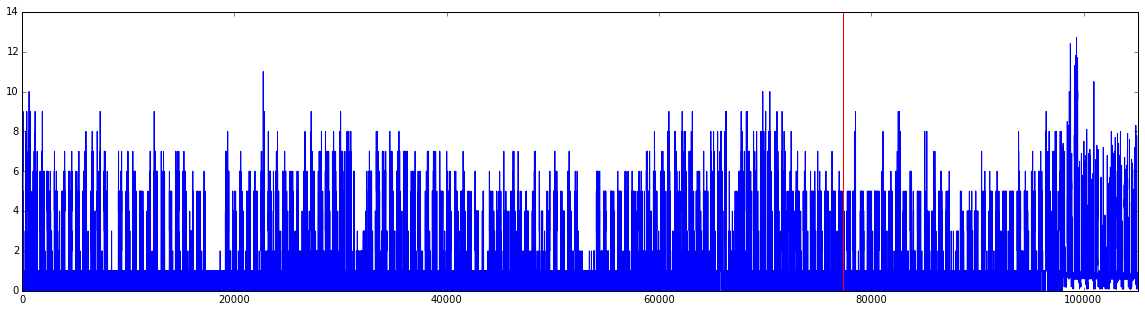

In [12]:
f = a['target'].plot(figsize=(20,5))
f.axvline(len(a)-testing_set_point, color='r')

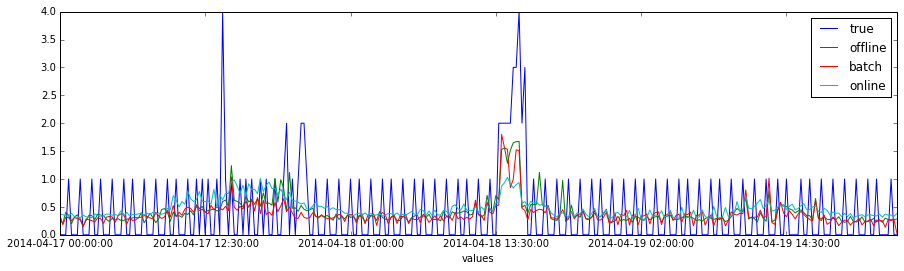

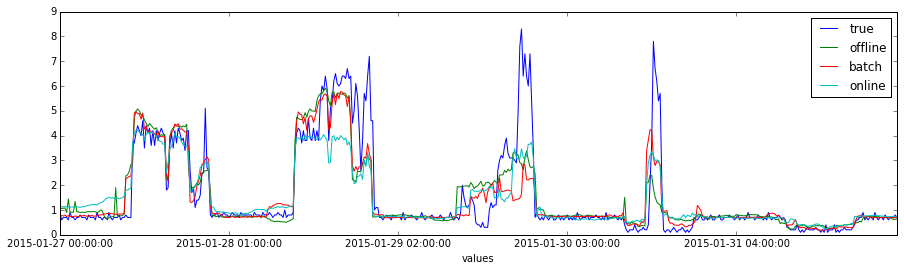

In [13]:
main_subset['2014-04-17 00:00:00':'2014-04-20 00:00:00'][['true','offline','batch', 'online']].plot(figsize=(15,4))
main_subset['2015-01-27 00:00:00':'2015-02-01 23:59:00'][['true','offline','batch', 'online']].plot(figsize=(15,4))

In [39]:
from sklearn.metrics import r2_score

def r2( g ):
    r2_lv = r2_score( g['true'], g['last value'] )
    r2_pd = r2_score( g['true'], g['previous day'] )
    r2_pw = r2_score( g['true'], g['previous week'] )
    r2_offline = r2_score( g['true'], g['offline'] )
    r2_batch = r2_score( g['true'], g['batch'] )
    r2_online = r2_score( g['true'], g['online'] )
    return pd.Series( dict(  r2_lv=r2_lv, r2_pd=r2_pd, r2_pw=r2_pw, r2_offline=r2_offline, r2_batch=r2_batch, r2_online=r2_online ) )

#subset = test['2014-04-17 00:00:00':'2014-04-27 00:00:00']
#subset = test.loc[20]['2015-01-05 00:00:00':'2015-02-01 23:59:00']
#subset = test['2014-04-17 00:00:00':'2015-02-01 23:59:00']
a=main_subset.groupby(main_subset.index.to_datetime().dayofyear, sort=False).apply(r2)
a

,r2_batch,r2_lv,r2_offline,r2_online,r2_pd,r2_pw
107,0.035130,-7.685484,0.022135,-0.058434,-6.814516,-0.814516
108,0.346873,-0.530303,0.376491,0.204668,-0.333333,-0.015152
109,-0.064750,-2.894085,-0.094640,-0.206935,-4.462535,-1.704225
110,-2.303157,-0.081690,-3.418916,-3.238215,-1.379718,-26.853521
111,0.760626,-0.553179,0.755585,0.668517,-0.602068,0.744271
112,0.764883,-0.398496,0.771219,0.740204,0.577580,0.593985
113,0.817439,-0.519628,0.810826,0.772623,0.683093,0.656366
114,0.033624,-4.542650,0.076473,-0.100949,-3.301270,-0.415608
115,0.069964,-5.338164,-0.162200,-0.189447,-4.204509,-3.173913
116,0.005039,-0.406197,0.081787,0.077395,-0.406197,0.134648


Bar plot for last month. Major improvement for batch and online is not visible.

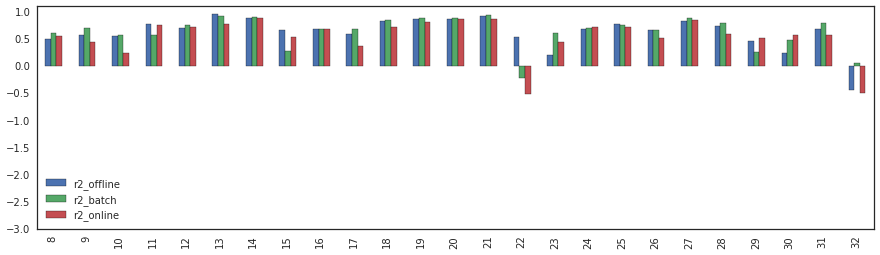

In [46]:
a[['r2_offline','r2_batch', 'r2_online']].tail(25).plot( kind='bar', figsize=(15,4), ylim=(-3, 1.1))

This can also be seen from the distribution plot

In [17]:
#subset = test.loc[20]['2014-04-17 00:00:00':'2015-02-01 23:59:00']
#main_subset['2014-04-17 00:00:00':'2015-02-01 23:59:00']
#a=subset.groupby(subset.index.to_datetime().dayofyear, sort=False).apply(r2)

b = a[['r2_offline','r2_batch', 'r2_online']]
#a[['r2_offline','r2_batch']].plot( kind='hist', figsize=(15,4))
#a[['r2_offline','r2_batch']].hist(figsize=(15,4), bins=20)
#a[['r2_offline','r2_batch']].plot.hist(bins=30)
b[b > 0].plot.hist(bins=30, alpha=0.6)

AttributeError: 'function' object has no attribute 'hist'

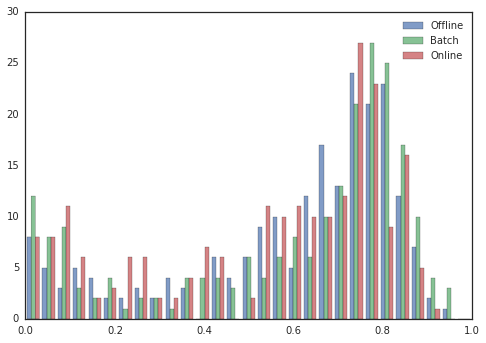

In [47]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-deep')

b = a[['r2_offline','r2_batch', 'r2_online']]

c = b[b > 0].reset_index()[['r2_offline','r2_batch', 'r2_online']]

#c = c.fillna(0)

x = c["r2_offline"].values
y = c["r2_batch"].values
z = c["r2_online"].values
data = np.vstack([x, y, z]).T
bins = np.linspace(0, 1, 30)

plt.hist(data, bins, alpha=0.7, label=['Offline', 'Batch', 'Online'])
plt.legend(loc='upper right')
plt.show()

R2 scatter plot

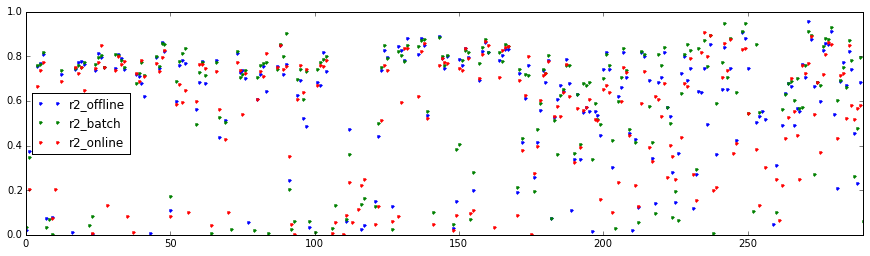

In [20]:
a=main_subset.groupby(main_subset.index.to_datetime().dayofyear, sort=False).apply(r2)

b = a[['r2_offline','r2_batch', 'r2_online']]

#a[['r2_offline','r2_batch']].plot( figsize=(15,4), marker='*')
b[b > 0].reset_index()[['r2_offline','r2_batch', 'r2_online']].plot( figsize=(15,4), marker='.', linestyle='')

Scatter plot for entire testing dataset with regression plot trend, showing that Batch is better. Unfortunatelly the trend is downword. Maybe try with different sensor.

In [21]:
a.shape

(291, 6)

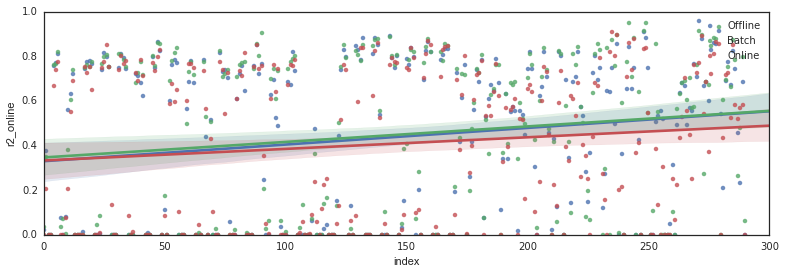

In [22]:
import seaborn as sns

sns.set_style("white")

a=main_subset.groupby(main_subset.index.to_datetime().dayofyear, sort=False).apply(r2)

#tmp = main_subset.loc['2014-04-17 00:00:00':'2015-02-01 23:59:00']
#a=tmp.groupby(tmp.index.to_datetime().dayofyear, sort=False).apply(r2)

b = a[['r2_offline','r2_batch', 'r2_online']]

#c = b.reset_index()[['r2_offline','r2_batch']]
c = b[b > 0].reset_index()[['r2_offline','r2_batch', 'r2_online']]
c = c.fillna(0)
c['index'] = c.index

plt.figure(figsize=(13,4))
#sns.pairplot(c, size=5, aspect=.8, kind="reg");
g = sns.regplot(y="r2_offline", x="index", data=c, label='Offline');
g.set(xlim=(0,300), ylim=(0,1))
sns.regplot(y="r2_batch", x="index", data=c, label='Batch');
sns.regplot(y="r2_online", x="index", data=c, label='Online');

plt.legend(loc='upper right')
plt.show()

In [23]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print "Offline slope:", slope

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[1].get_xdata(),y=g.get_lines()[1].get_ydata())
print "Batch slope:", slope

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[2].get_xdata(),y=g.get_lines()[2].get_ydata())
print "Online slope:", slope

Offline slope: 0.000745218784165
Batch slope: 0.000695240555458
Online slope: 0.000519569842076


## MAPE analysis

In [24]:
import regression_metrics as additional_metrics

def mape(g):
    mape_lv = additional_metrics.mean_absolute_percentage_error( g['true'], g['last value'] )
    mape_pd = additional_metrics.mean_absolute_percentage_error( g['true'], g['previous day'] )
    mape_pw = additional_metrics.mean_absolute_percentage_error( g['true'], g['previous week'] )
    mape_offline = additional_metrics.mean_absolute_percentage_error( g['true'], g['offline'] )
    mape_batch = additional_metrics.mean_absolute_percentage_error( g['true'], g['batch'] )
    mape_online = additional_metrics.mean_absolute_percentage_error( g['true'], g['online'] )
    return pd.Series( dict(  mape_lv=mape_lv, mape_pd=mape_pd, mape_pw=mape_pw, mape_offline=mape_offline, mape_batch=mape_batch, mape_online=mape_online ) )

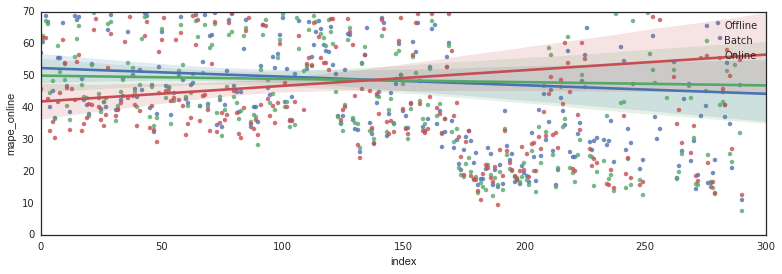

In [27]:
a=main_subset.groupby(main_subset.index.to_datetime().dayofyear, sort=False).apply(mape)

#tmp = main_subset.loc['2014-04-17 00:00:00':'2015-02-01 23:59:00']
#a=tmp.groupby(tmp.index.to_datetime().dayofyear, sort=False).apply(mape)

b = a[['mape_offline','mape_batch', 'mape_online']]

c = b[b > 0].reset_index()[['mape_offline','mape_batch', 'mape_online']]
c = c.fillna(0)
#c = b.reset_index()[['mape_offline','mape_batch']]
c['index'] = c.index

plt.figure(figsize=(13,4))
#sns.pairplot(c, size=5, aspect=.8, kind="reg");
g = sns.regplot(y="mape_offline", x="index", data=c, label='Offline');
g.set(xlim=(0,300), ylim=(0,70))
sns.regplot(y="mape_batch", x="index", data=c, label='Batch');
sns.regplot(y="mape_online", x="index", data=c, label='Online');

plt.legend(loc='upper right')
plt.show()

In [26]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print "Offline slope:", slope

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[1].get_xdata(),y=g.get_lines()[1].get_ydata())
print "Batch slope:", slope

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[2].get_xdata(),y=g.get_lines()[2].get_ydata())
print "Online slope:", slope

Offline slope: -0.0269437628163
Batch slope: -0.0102093463595
Online slope: 0.0489895874385


In [33]:
main_subset.to_csv('./data/predictions_rf_id11010024.csv')

## Future work

- more horizons
- more sensors
- online approach